## Importing the data and necessary libraries

In [269]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [270]:
digit_data = load_digits()

In [271]:
digit_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [272]:
for i in digit_data.keys():
    try:
        print("Shape of", i, ":", digit_data[i].shape)
    except:
        try:
            print("Length of", i, ":", len(digit_data[i]))
        except:
            print("Data of", i, ":", digit_data[i])

Shape of data : (1797, 64)
Shape of target : (1797,)
Data of frame : None
Length of feature_names : 64
Shape of target_names : (10,)
Shape of images : (1797, 8, 8)
Length of DESCR : 2027


## Displaying 8 random images in order

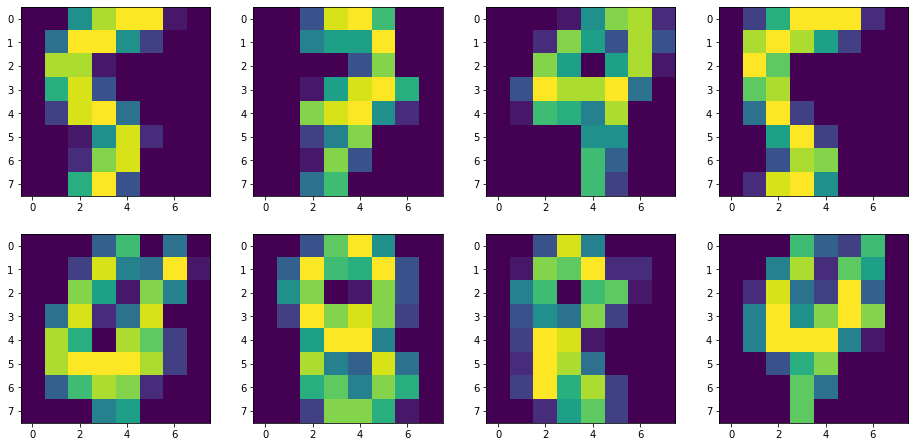

In [273]:
import random
n = random.randint(0, 1796)

nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


for i, img in enumerate(digit_data.images[n:n+8]):
    sp = plt.subplot(nrows, ncols, i + 1)
#     sp.axis('Off') 
    plt.imshow(img.reshape([8, 8]))

plt.show()

In [274]:
X, y = digit_data.data, digit_data.target

X[0, :].reshape([8, 8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## Checking if the data is linearly separable 

Principal Component Analysis (PCA) is applied on the data to reduce it to 2 and 3 dimensions. 

In [275]:
df = pd.DataFrame(digit_data.data, columns=digit_data.feature_names)
df['Target'] = pd.DataFrame(digit_data.target)
print("Shape of original Dataset: ", df.shape)
df.head()

Shape of original Dataset:  (1797, 65)


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


#### Applying PCA (2 components)

In [276]:
labels = df['Target'].unique()
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [277]:
from sklearn.decomposition import PCA

In [278]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
pca1 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pcadf1 = pd.concat([pca1, df[['Target']]], axis = 1)
print("Shape of the dataset after being reduced to 2 features: ", pca1.shape)
pcadf1.head(10)

Shape of the dataset after being reduced to 2 features:  (1797, 2)


,principal component 1,principal component 2,Target
0,-1.259466,21.274885,0
1,7.957611,-20.768698,1
2,6.991922,-9.955988,2
3,-15.906104,3.332463,3
4,23.306866,4.269062,4
5,-14.087085,7.914449,5
6,21.363409,5.288342,6
7,-2.952607,-21.071665,7
8,-5.255135,1.183362,8
9,-5.480199,8.076333,9


#### Plotting the two dimensions 

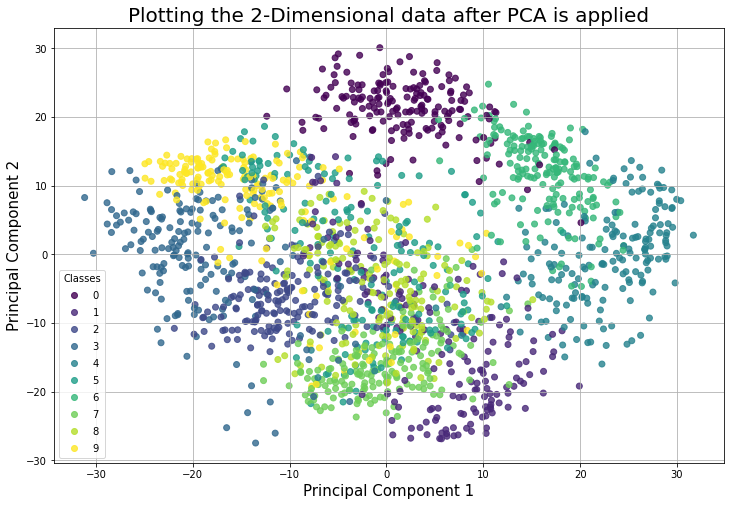

In [279]:
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(pca1['principal component 1'], 
                     pca1['principal component 2'], 
                     c = df['Target'], alpha=0.8)
plt.title('Plotting the 2-Dimensional data after PCA is applied', fontsize = 20)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.legend(*scatter.legend_elements(), loc="best", title="Classes")
ax.plot([])
ax.grid()
plt.show()

Thus, they are linearly separable to some extent

In [280]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

#### Applying PCA (3 components)

In [281]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
pca2 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 
                          'principal component 3'])
print("Shape of the dataset after being reduced to 3 features: ", pca2.shape)
pca2.head(10)

Shape of the dataset after being reduced to 3 features:  (1797, 3)


,principal component 1,principal component 2,principal component 3
0,-1.259467,21.274884,-9.463056
1,7.957612,-20.768699,4.439508
2,6.991923,-9.955987,2.958557
3,-15.906105,3.332465,9.824372
4,23.306868,4.269059,-5.675129
5,-14.087087,7.914449,0.392493
6,21.363410,5.288339,15.087406
7,-2.952607,-21.071665,-12.282902
8,-5.255134,1.183359,5.796255
9,-5.480199,8.076325,-5.028086


In [282]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594])

#### Plotting the 3 dimensions

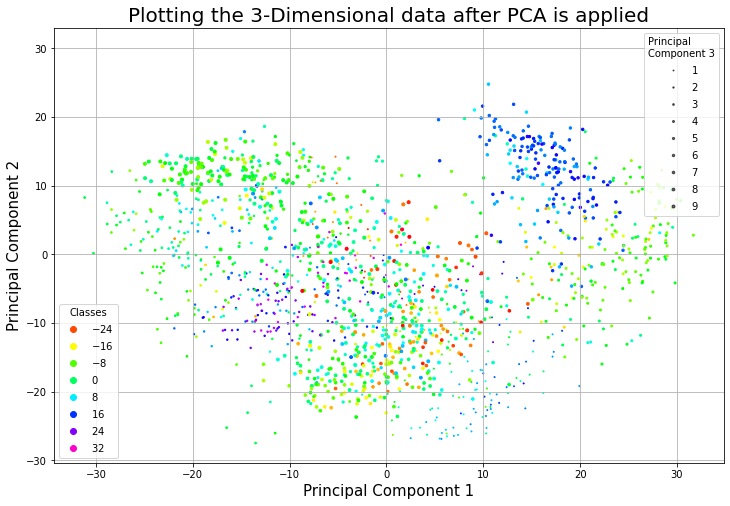

In [283]:
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(pca2['principal component 1'], 
                     pca2['principal component 2'], 
                     c = pca2['principal component 3'] , 
                     s = df['Target'],
                    cmap = 'gist_rainbow')
plt.title('Plotting the 3-Dimensional data after PCA is applied', fontsize = 20)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Principal\nComponent 3")
ax.grid()
plt.show()

#### Plotting in groups of 2 components out of 3

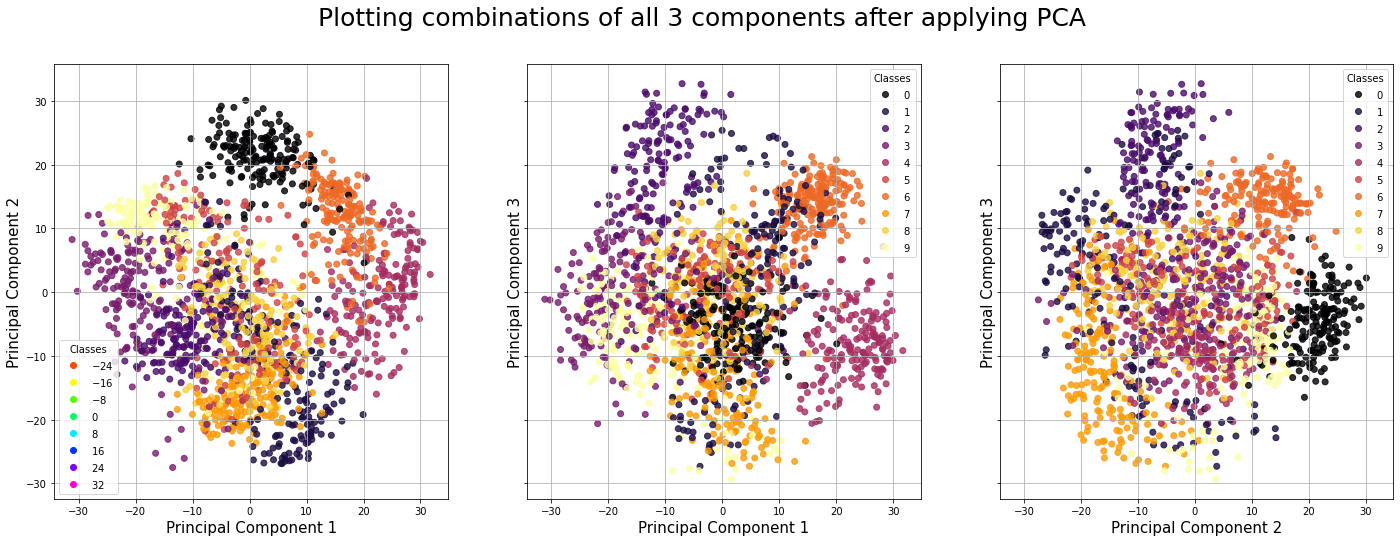

In [284]:
fig, ax = plt.subplots(1, 3, sharex = True, sharey = True, figsize=(24, 8))
plt.suptitle("Plotting combinations of all 3 components after applying PCA", fontsize = 25)

ax[0].scatter(pca2['principal component 1'], 
              pca2['principal component 2'], 
              c = df['Target'], alpha=0.8, 
              cmap = "inferno")
ax[0].set_xlabel('Principal Component 1', fontsize = 15)
ax[0].set_ylabel('Principal Component 2', fontsize = 15)
ax[0].legend(*scatter.legend_elements(), loc="best", title="Classes")
ax[0].grid()

scatter = ax[1].scatter(pca2['principal component 1'], 
                        pca2['principal component 3'], 
                        c = df['Target'], alpha=0.8, 
                        cmap = "inferno")
ax[1].set_xlabel('Principal Component 1', fontsize = 15)
ax[1].set_ylabel('Principal Component 3', fontsize = 15)
ax[1].legend(*scatter.legend_elements(), loc="best", title="Classes")
ax[1].grid()

scatter = ax[2].scatter(pca2['principal component 2'], 
                        pca2['principal component 3'], 
                        c = df['Target'], alpha=0.8, 
                        cmap = "inferno")
ax[2].set_xlabel('Principal Component 2', fontsize = 15)
ax[2].set_ylabel('Principal Component 3', fontsize = 15)
ax[2].legend(*scatter.legend_elements(), loc="best", title="Classes")
ax[2].grid()

plt.show()

In [285]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594])

## Building the model with different kernels

In [286]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# flatten the images
n_samples = len(digit_data.images)
data = digit_data.images.reshape((n_samples, -1))

In [287]:
# Use 80% of samples as training data size
X_train, X_test, y_train, y_test = train_test_split(data, digit_data.target, test_size=0.2, shuffle=False)

## Making models with different kernels (without applying PCA)

#### 1. linear kernel

In [288]:
# linear kernel classifier
linear = svm.SVC(kernel = "linear")
linear.fit(X_train, y_train)
predicted = linear.predict(X_test)

print(" accuracy = ", accuracy_score(y_test, predicted), "\n")
print(" f1_score = ", f1_score(y_test, predicted, average='micro'), "\n")
print("Confusion Matrix: \n\n", confusion_matrix(y_test, predicted), "\n")
print("Classification Report: \n\n", classification_report(y_test, predicted))

 accuracy =  0.9305555555555556 

 f1_score =  0.9305555555555556 

Confusion Matrix: 

 [[34  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  2  0  0  6  0]
 [ 0  0  0  0 34  0  0  0  1  2]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  1  0  0 34  1  0]
 [ 0  3  0  1  0  0  0  1 28  0]
 [ 0  1  0  2  0  0  0  0  1 33]] 

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.88      0.97      0.92        36
           2       1.00      1.00      1.00        35
           3       0.91      0.78      0.84        37
           4       0.94      0.92      0.93        37
           5       0.95      1.00      0.97        37
           6       1.00      0.97      0.99        37
           7       0.97      0.94      0.96        36
           8       0.76      0.85      0.80        33
           

Text(69.0, 0.5, 'Truth')

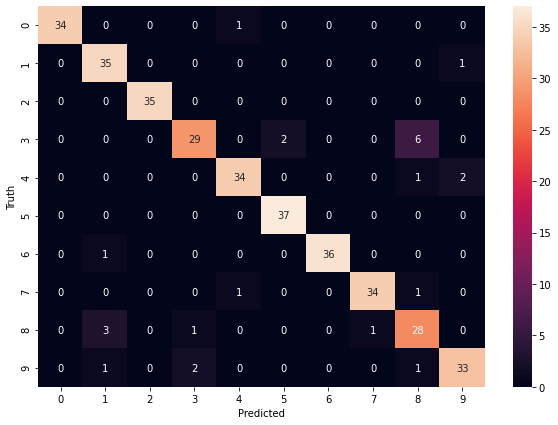

In [289]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, predicted), annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

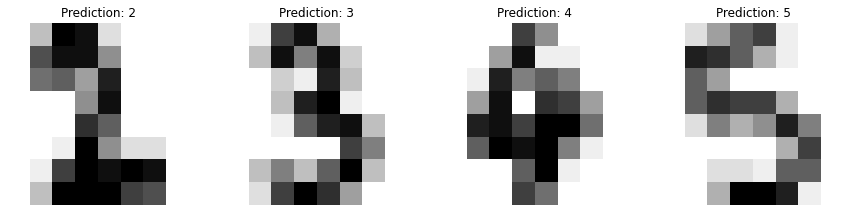

In [290]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

#### 2. rbf kernel

In [291]:
# rbf kernel classifier
rbf = svm.SVC(gamma=0.001, C = 3, kernel = "rbf")
rbf.fit(X_train, y_train)
predicted = rbf.predict(X_test)

print(" accuracy = ", accuracy_score(y_test, predicted), "\n")
print(" f1_score = ", f1_score(y_test, predicted, average='micro'), "\n")
print("Confusion Matrix: \n\n", confusion_matrix(y_test, predicted), "\n")
print("Classification Report: \n\n", classification_report(y_test, predicted))

 accuracy =  0.9638888888888889 

 f1_score =  0.9638888888888889 

Confusion Matrix: 

 [[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  2  0  0  4  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  1  0  0  1 35]] 

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       1.00      0.84      0.91        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        36
           8       0.86      0.97      0.91        33
           

Text(69.0, 0.5, 'Truth')

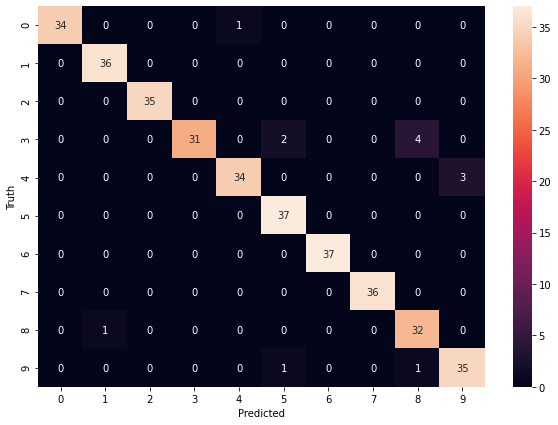

In [292]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, predicted), annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

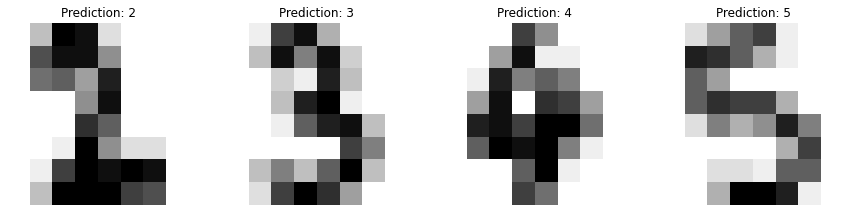

In [293]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

#### 3. poly kernel

In [294]:
# poly kernel classifier
poly = svm.SVC(gamma=0.001, C = 10, kernel = "poly")
poly.fit(X_train, y_train)
predicted = poly.predict(X_test)

print(" accuracy = ", accuracy_score(y_test, predicted), "\n")
print(" f1_score = ", f1_score(y_test, predicted, average='micro'), "\n")
print("Confusion Matrix: \n\n", confusion_matrix(y_test, predicted), "\n")
print("Classification Report: \n\n", classification_report(y_test, predicted))

 accuracy =  0.9527777777777777 

 f1_score =  0.9527777777777777 

Confusion Matrix: 

 [[33  0  0  0  1  0  1  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  2  0  1  3  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  0  0  1 31  0]
 [ 0  0  0  0  0  1  0  1  1 34]] 

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      0.84      0.91        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       0.97      0.97      0.97        37
           7       0.92      1.00      0.96        36
           8       0.89      0.94      0.91        33
           

Text(69.0, 0.5, 'Truth')

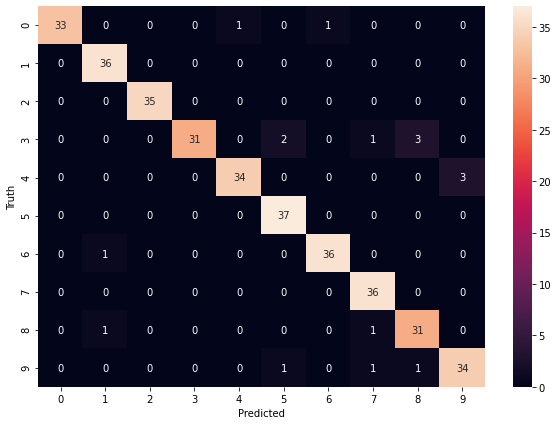

In [295]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, predicted), annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

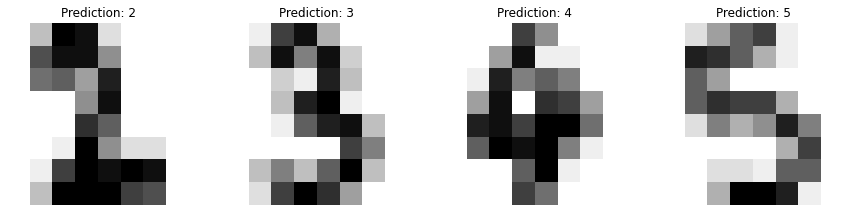

In [296]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')